In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import norm
from scipy.special import gamma as gamma_func
from scipy.integrate import quad
import tikzplotlib as tpl
np.random.seed(42)

In [3]:
# Make inline plots vector graphics
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("pdf", "svg")

#matplotlib.rc("font", **{"family": "serif", "serif": ["Computer Modern"]})
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsfonts} \usepackage{amsmath}"

# Inverse Gamma Distribution

In [4]:
#change the basis, i.e. x -> t(x)

def inv_gamma_pdf(x, a, l):
    r = l**a/gamma_func(a) * (x ** (-a-1)) * (np.exp(-l/x))
    return(r)

def inv_gamma_t_log_pdf(x, a, l):
    c = l**a/gamma_func(a) 
    r = c * (np.exp(x) ** -a) * (np.exp(-l/np.exp(x)))
    return(r)

def inv_gamma_t_sqrt_pdf(x, a, l):
    c = 2*l**a/gamma_func(a)
    r = c * (x ** (-2*a-1)) * (np.exp(-l/x**2))
    return(r)

def inv_gamma_mu(a, l):
    return(l/(a+1))

def inv_gamma_var(a,l):
    return(l**2/(a+1)**3)
    
"""Transforms: log"""

def inv_gamma_t_log_mu(a, l):
    return(np.log(l/a))

def inv_gamma_t_log_var(a):
    return(1/a)

def log_normal_back(x, mu, sigma):
    x_ = np.log(x)
    return(norm.pdf(x_, mu, sigma) * 1/x)

"""Transforms: sqrt"""

def inv_gamma_t_sqrt_mu(a, l):
    return(np.sqrt(l/(a+0.5)))

def inv_gamma_t_sqrt_var(a, l):
    return(l/(4 * (a+0.5)**2))

def sqrt_normal_back(x, mu, sigma):
    x_ = np.sqrt(x)
    return(norm.pdf(x_, mu, sigma) * 0.5 * 1/np.sqrt(x))

In [5]:
"""values"""

def plot_inverse_gamma_t_log(params, save=False, filename='gamma_log_bridge.pdf', show_back=True):
    
    a1, l1 = params[0] #5,1
    a2, l2 = params[1] #4,2
    a3, l3 = params[2] #8,3

    #standard base
    mode1 = inv_gamma_mu(a1, l1)
    mode2 = inv_gamma_mu(a2, l2)
    mode3 = inv_gamma_mu(a3, l3)

    sigma1 = np.sqrt(inv_gamma_var(a1, l1))
    sigma2 = np.sqrt(inv_gamma_var(a2, l2))
    sigma3 = np.sqrt(inv_gamma_var(a3, l3))

    x = np.linspace(0, 2, 1000 + 1)
    x_t = np.linspace(-3, 2, 1000 + 1)
    y1 = inv_gamma_pdf(x, a1, l1) 
    y2 = inv_gamma_pdf(x, a2, l2) 
    y3 = inv_gamma_pdf(x, a3, l3) 
    lp_approx1 = norm.pdf(x, loc=mode1, scale=sigma1)
    lp_approx2 = norm.pdf(x, loc=mode2, scale=sigma2)
    lp_approx3 = norm.pdf(x, loc=mode3, scale=sigma3)

    #log basis
    y1_t_log = inv_gamma_t_log_pdf(x_t, a1, l1) 
    y2_t_log = inv_gamma_t_log_pdf(x_t, a2, l2) 
    y3_t_log = inv_gamma_t_log_pdf(x_t, a3, l3) 
    mode1_t_log = inv_gamma_t_log_mu(a1, l1)
    mode2_t_log = inv_gamma_t_log_mu(a2, l2)
    mode3_t_log = inv_gamma_t_log_mu(a3, l3)

    sigma1_t_log = np.sqrt(inv_gamma_t_log_var(a1))
    sigma2_t_log = np.sqrt(inv_gamma_t_log_var(a2))
    sigma3_t_log = np.sqrt(inv_gamma_t_log_var(a3))
    lp_approx1_t_log = norm.pdf(x_t, loc=mode1_t_log, scale=sigma1_t_log)
    lp_approx2_t_log = norm.pdf(x_t, loc=mode2_t_log, scale=sigma2_t_log)
    lp_approx3_t_log = norm.pdf(x_t, loc=mode3_t_log, scale=sigma3_t_log)

    #back
    y1_back = log_normal_back(x, mode1_t_log, sigma1_t_log) 
    y2_back = log_normal_back(x, mode2_t_log, sigma2_t_log) 
    y3_back = log_normal_back(x, mode3_t_log, sigma3_t_log) 

    """Plots"""
    plt.rc('text', usetex=True)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=15)
    plt.rc('axes', labelsize=15)
    
    legend_size=14
    xlabel_size=15
    ylabel_size=15
    title_size=15
    lw=2

    if show_back:
        fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(10, 3))
    else:
        fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(10, 3))
        
    #first plot
    axs[0].plot(x, y1, 'r-', lw=lw)
    axs[0].plot(x, y2, 'b-', lw=lw)
    axs[0].plot(x, y3, 'k-', lw=lw, label='$\mathcal{IG}$')
    axs[0].plot(x, lp_approx1, 'r--', lw=lw)
    axs[0].plot(x, lp_approx2, 'b--', lw=lw)
    axs[0].plot(x, lp_approx3, 'k--', lw=lw, label='$\mathcal{N}$')
    axs[0].set_yticklabels([])
    axs[0].set_yticks([])
    axs[0].set_xlabel('$g(x)$', fontsize=xlabel_size)
    axs[0].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
    axs[0].set_title('Laplace in standard basis', fontsize=title_size)
    axs[0].legend(prop={'size': legend_size});

    #second plot
    axs[1].plot(x_t, y1_t_log, 'r-', lw=lw)
    axs[1].plot(x_t, y2_t_log, 'b-', lw=lw)
    axs[1].plot(x_t, y3_t_log, 'k-', lw=lw, label='$\mathcal{IG}$')
    axs[1].plot(x_t, lp_approx1_t_log, 'r--', lw=lw)
    axs[1].plot(x_t, lp_approx2_t_log, 'b--', lw=lw)
    axs[1].plot(x_t, lp_approx3_t_log, 'k--', lw=lw, label='$\mathcal{N}$')
    axs[1].set_yticklabels([])
    axs[1].set_yticks([])
    axs[1].set_xlabel('$x$', fontsize=xlabel_size)
    axs[1].set_ylabel('$p(x)dx$', fontsize=ylabel_size)
    axs[1].set_title('Laplace in log basis', fontsize=title_size)
    axs[1].legend(prop={'size': legend_size});

    if show_back:
        axs[2].plot(x, y1, 'r-', lw=lw)
        axs[2].plot(x, y2, 'b-', lw=lw)
        axs[2].plot(x, y3, 'k-', lw=lw, label="$\mathcal{IG}$");
        axs[2].plot(x, y1_back, 'r--', lw=lw)
        axs[2].plot(x, y2_back, 'b--', lw=lw)
        axs[2].plot(x, y3_back, 'k--', lw=lw, label="$\mathcal{N}$")
        axs[2].set_yticklabels([])
        axs[2].set_yticks([])
        axs[2].set_xlabel('$g(x)$', fontsize=xlabel_size)
        axs[2].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
        axs[2].set_title('Back to standard basis', fontsize=title_size)
        axs[2].legend(prop={'size': legend_size});

    plt.tight_layout()
    
    if save:
        plt.savefig(filename)
        #"""
        tpl.save(
            "inverse_gamma_log_bridge.tex",
            figure = fig,
            axis_width = "\\figwidth",
            axis_height= "\\figheight",
            tex_relative_path_to_data=".",
            override_externals=True,
            float_format=".3g",
            #strict=True
        )
        #"""
        
    plt.show()

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


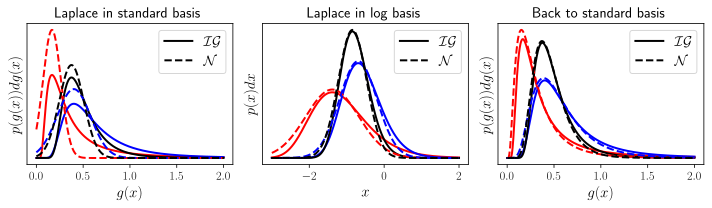

In [6]:
plot_inverse_gamma_t_log(params=[[2,0.5], [4,2], [7,3]], save=True, filename='Inverse_Gamma_log_bridge.pdf', 
                         show_back=True)

In [7]:
############# sqrt bridge #################

def plot_inverse_gamma_t_sqrt(params, save=False, filename='gamma_sqrt_bridge.pdf', show_back=True, samples=False):

    a1, l1 = params[0] #5,1
    a2, l2 = params[1] #4,2
    a3, l3 = params[2] #8,3

    mode1 = inv_gamma_mu(a1, l1)
    mode2 = inv_gamma_mu(a2, l2)
    mode3 = inv_gamma_mu(a3, l3)

    sigma1 = np.sqrt(inv_gamma_var(a1, l1))
    sigma2 = np.sqrt(inv_gamma_var(a2, l2))
    sigma3 = np.sqrt(inv_gamma_var(a3, l3))

    x = np.linspace(0, 2, 1000 + 1)
    x_t = np.linspace(0, 2, 1000 + 1)
    y1 = inv_gamma_pdf(x, a1, l1) 
    y2 = inv_gamma_pdf(x, a2, l2) 
    y3 = inv_gamma_pdf(x, a3, l3) 
    lp_approx1 = norm.pdf(x, loc=mode1, scale=sigma1)
    lp_approx2 = norm.pdf(x, loc=mode2, scale=sigma2)
    lp_approx3 = norm.pdf(x, loc=mode3, scale=sigma3)

    #sqrt basis
    if samples:
        from scipy.stats import invgamma
        invgamma_samples2 = invgamma.rvs(a2, scale=l2, size=10000)
        invgamma_samples2_sqrt = np.sqrt(invgamma_samples2)
        
    y1_t_sqrt = inv_gamma_t_sqrt_pdf(x_t, a1, l1) 
    y2_t_sqrt = inv_gamma_t_sqrt_pdf(x_t, a2, l2) 
    y3_t_sqrt = inv_gamma_t_sqrt_pdf(x_t, a3, l3) 
    mode1_t_sqrt = inv_gamma_t_sqrt_mu(a1, l1)
    mode2_t_sqrt = inv_gamma_t_sqrt_mu(a2, l2)
    mode3_t_sqrt = inv_gamma_t_sqrt_mu(a3, l3)

    sigma1_t_sqrt = np.sqrt(inv_gamma_t_sqrt_var(a1, l1))
    sigma2_t_sqrt = np.sqrt(inv_gamma_t_sqrt_var(a2, l2))
    sigma3_t_sqrt = np.sqrt(inv_gamma_t_sqrt_var(a3, l3))
    lp_approx1_t_sqrt = norm.pdf(x_t, loc=mode1_t_sqrt, scale=sigma1_t_sqrt)
    lp_approx2_t_sqrt = norm.pdf(x_t, loc=mode2_t_sqrt, scale=sigma2_t_sqrt)
    lp_approx3_t_sqrt = norm.pdf(x_t, loc=mode3_t_sqrt, scale=sigma3_t_sqrt)

    #back
    y1_back = sqrt_normal_back(x, mode1_t_sqrt, sigma1_t_sqrt) 
    y2_back = sqrt_normal_back(x, mode2_t_sqrt, sigma2_t_sqrt) 
    y3_back = sqrt_normal_back(x, mode3_t_sqrt, sigma3_t_sqrt) 


    """Plots"""
    plt.rc('text', usetex=True)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=15)
    plt.rc('axes', labelsize=15)
    
    legend_size=14
    xlabel_size=15
    ylabel_size=15
    title_size=16
    lw=2

    if show_back:
        fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(10, 3))
    else:
        fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(10, 3))
        
    #first plot
    axs[0].plot(x, y1, 'r-', lw=lw)
    axs[0].plot(x, y2, 'b-', lw=lw)
    axs[0].plot(x, y3, 'k-', lw=lw, label='$\mathcal{IG}$')
    axs[0].plot(x, lp_approx1, 'r--', lw=lw)
    axs[0].plot(x, lp_approx2, 'b--', lw=lw)
    axs[0].plot(x, lp_approx3, 'k--', lw=lw, label='$\mathcal{N}$')
    axs[0].set_yticklabels([])
    axs[0].set_yticks([])
    axs[0].set_xlabel('$g(x)$', fontsize=xlabel_size)
    axs[0].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
    axs[0].set_title('Laplace in standard basis', fontsize=title_size)
    axs[0].legend(prop={'size': legend_size});

    #second plot
    axs[1].plot(x_t, y1_t_sqrt, 'r-', lw=lw)
    axs[1].plot(x_t, y2_t_sqrt, 'b-', lw=lw)
    if samples:
        axs[1].hist(invgamma_samples2_sqrt, density=True, alpha=0.5, color='blue', bins=100, range=[0,2])
    axs[1].plot(x_t, y3_t_sqrt, 'k-', lw=lw, label='$\mathcal{IG}$')
    axs[1].plot(x_t, lp_approx1_t_sqrt, 'r--', lw=lw)
    axs[1].plot(x_t, lp_approx2_t_sqrt, 'b--', lw=lw)
    axs[1].plot(x_t, lp_approx3_t_sqrt, 'k--', lw=lw, label='$\mathcal{N}$')
    axs[1].set_yticklabels([])
    axs[1].set_yticks([])
    axs[1].set_xlabel('$x$', fontsize=xlabel_size)
    axs[1].set_ylabel('$p(x)dx$', fontsize=ylabel_size)
    axs[1].set_title('Laplace in sqrt basis', fontsize=title_size)
    axs[1].legend(prop={'size': legend_size});

    if show_back:
        axs[2].plot(x, y1, 'r-', lw=lw)
        axs[2].plot(x, y2, 'b-', lw=lw)
        axs[2].plot(x, y3, 'k-', lw=lw, label="$\mathcal{IG}$");
        axs[2].plot(x, y1_back, 'r--', lw=lw)
        axs[2].plot(x, y2_back, 'b--', lw=lw)
        axs[2].plot(x, y3_back, 'k--', lw=lw, label="$\mathcal{N}$")
        axs[2].set_yticklabels([])
        axs[2].set_yticks([])
        axs[2].set_xlabel('$g(x)$', fontsize=xlabel_size)
        axs[2].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
        axs[2].set_title('Back to standard basis', fontsize=title_size)
        axs[2].legend(prop={'size': legend_size});

    plt.tight_layout()
    
    if save:
        plt.savefig(filename)
        #"""
        tpl.save(
            "inverse_gamma_sqrt_bridge.tex",
            figure = fig,
            axis_width = "\\figwidth",
            axis_height= "\\figheight",
            tex_relative_path_to_data=".",
            override_externals=True,
            float_format=".3g",
            #strict=True
        )
        #"""
        
    plt.show()

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in power
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: Runtime

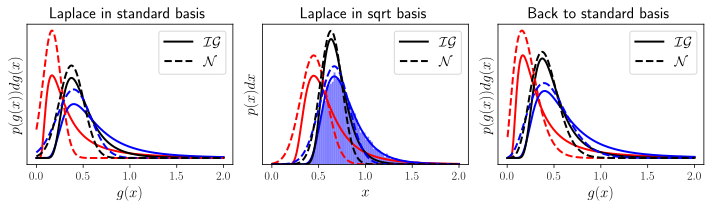

In [9]:
plot_inverse_gamma_t_sqrt(params=[[2,0.5], [4,2], [7,3]], save=True, filename='Inverse_Gamma_sqrt_bridge.pdf', 
                          show_back=True, samples=True)

# Verify the Bridges

In [46]:
#verify the log bridge

def inv_gamma_t_log_lambda(m,s): 
    return(np.exp(m)/s**2)

def inv_gamma_t_log_alpha(s):
    return(1/s**2)
    

test_a1, test_l1 = 3,4
test_m1, test_s1 = inv_gamma_t_log_mu(test_a1, test_l1), np.sqrt(inv_gamma_t_log_var(test_a1))
test_a2, test_l2 = inv_gamma_t_log_alpha(test_s1), inv_gamma_t_log_lambda(test_m1, test_s1)

print(test_a2, test_l2)

rand_a1, rand_l1 = np.random.random(), np.random.random()
rand_m1, rand_s1 = inv_gamma_t_log_mu(rand_a1, rand_l1), np.sqrt(inv_gamma_t_log_var(rand_a1))
rand_a2, rand_l2 = inv_gamma_t_log_alpha(rand_s1), inv_gamma_t_log_lambda(rand_m1, rand_s1)

assert(np.allclose(rand_a1, rand_a2))
assert(np.allclose(rand_l1, rand_l2))

3.0 4.0


In [47]:
#verify the sqrt bridge

def inv_gamma_t_sqrt_lambda(m, s): 
    return(m**4/(4*s**2))

def inv_gamma_t_sqrt_alpha(m, s):
    return(m**2/(4*s**2) - 0.5)
    
    

test_a3, test_l3 = 5,6
test_m3, test_s3 = inv_gamma_t_sqrt_mu(test_a3, test_l3), np.sqrt(inv_gamma_t_sqrt_var(test_a3, test_l3))
test_a4, test_l4 = inv_gamma_t_sqrt_alpha(test_m3, test_s3), inv_gamma_t_sqrt_lambda(test_m3, test_s3)

print(test_a4, test_l4)

rand_a3, rand_l3 = np.random.random()+1, np.random.random()+1
rand_m3, rand_s3 = inv_gamma_t_sqrt_mu(rand_a3, rand_l3), np.sqrt(inv_gamma_t_sqrt_var(rand_a3, rand_l3))
rand_a4, rand_l4 = inv_gamma_t_sqrt_alpha(rand_m3, rand_s3), inv_gamma_t_sqrt_lambda(rand_m3, rand_s3)

assert(np.allclose(rand_a3, rand_a4))
assert(np.allclose(rand_l3, rand_l4))

4.999999999999999 5.999999999999999


# Statistical distance measures

In [48]:
from torch_two_sample import MMDStatistic
from scipy.stats import norm, invgamma
import torch

## MMD from 100 combinations of parameters

In [49]:
def MMD_combinations(params, plot=False, n_samples=1000, verbose=True):
    
    As = params[0]
    Ls = params[1]
    
    MMD_sum = 0
    MMD_t_sqrt_sum = 0
    MMD_t_log_sum = 0 

    for a in As:
        for l in Ls:
            
            if verbose:
                print("a: ", a, "l: ", l)
                
            if a < 1:
                print("a < 1: not legitimate in standard base")
            
            #get samples from all dists
            #standard
            IG_samples = invgamma.rvs(a, scale=l, size=n_samples)
            if a >= 1:                
                mode1 = inv_gamma_mu(a, l)
                sigma1 = np.sqrt(inv_gamma_var(a, l))
                N_samples = norm.rvs(mode1, sigma1, size=n_samples)
            
            #log
            mode1_log = inv_gamma_t_log_mu(a, l)
            sigma1_log = np.sqrt(inv_gamma_t_log_var(a))
            IG_samples_log = np.log(IG_samples)
            N_samples_log = norm.rvs(mode1_log, sigma1_log, size=n_samples)
            
            #sqrt
            mode1_sqrt = inv_gamma_t_sqrt_mu(a, l)
            sigma1_sqrt = np.sqrt(inv_gamma_t_sqrt_var(a, l))
            IG_samples_sqrt = np.sqrt(IG_samples)
            N_samples_sqrt = norm.rvs(mode1_sqrt, sigma1_sqrt, size=n_samples)
            
            
            #calculate MMD for all bases
            MMD = MMDStatistic(n_samples, n_samples)
            
            #standard
            IG_samples_ = torch.Tensor(IG_samples.reshape((n_samples, -1)))
            if a >= 1:
                N_samples_ = torch.Tensor(N_samples.reshape((n_samples, -1)))
                MMD_ = MMD(IG_samples_, N_samples_,  alphas=[0.5], ret_matrix=False)
            else:
                MMD_ = torch.Tensor([np.nan])
                
            #log
            IG_samples_log_ = torch.Tensor(IG_samples_log.reshape((n_samples, -1)))
            N_samples_log_ = torch.Tensor(N_samples_log.reshape((n_samples, -1)))
            MMD_log_= MMD(IG_samples_log_, N_samples_log_,  alphas=[0.5], ret_matrix=False)
            
            #sqrt
            IG_samples_sqrt_ = torch.Tensor(IG_samples_sqrt.reshape((n_samples, -1)))
            N_samples_sqrt_ = torch.Tensor(N_samples_sqrt.reshape((n_samples, -1)))
            MMD_sqrt_ = MMD(IG_samples_sqrt_, N_samples_sqrt_,  alphas=[0.5], ret_matrix=False)

            if plot:
                n_bins = int(np.sqrt(n_samples))
                fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(23, 6))
                axs[0].hist(IG_samples, bins = n_bins, alpha=0.5, label='$\mathcal{IG}$')
                axs[0].hist(N_samples, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
                axs[0].set_title('standard basis')
                axs[0].legend()
                
                axs[1].hist(IG_samples_log, bins = n_bins, alpha=0.5, label='$\mathcal{IG}$')
                axs[1].hist(N_samples_log, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
                axs[1].set_title('log basis')
                axs[1].legend()
                
                axs[2].hist(IG_samples_sqrt, bins = n_bins, alpha=0.5, label='$\mathcal{IG}$')
                axs[2].hist(N_samples_sqrt, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
                axs[2].set_title('sqrt basis')
                axs[2].legend()
                
                plt.show()
                
            if verbose: 
                print("standard: ", MMD_.item(), "log: ", MMD_log_.item(), "sqrt: ", MMD_sqrt_.item())

            #add them to their respective sums
            MMD_sum += MMD_
            MMD_t_log_sum += MMD_log_
            MMD_t_sqrt_sum += MMD_sqrt_
            
    return(MMD_sum.item(), MMD_t_log_sum.item(), MMD_t_sqrt_sum.item())

In [50]:
MMD_combinations(params=[range(2, 12), range(1, 11)], plot=False, verbose=True, n_samples=2000)

a:  2 l:  1
standard:  0.10907721519470215 log:  0.01443183422088623 sqrt:  0.03674125671386719
a:  2 l:  2
standard:  0.1589793562889099 log:  0.014983952045440674 sqrt:  0.05698651075363159
a:  2 l:  3
standard:  0.16453129053115845 log:  0.014824986457824707 sqrt:  0.0629734992980957
a:  2 l:  4
standard:  0.14134979248046875 log:  0.01731240749359131 sqrt:  0.0760335922241211
a:  2 l:  5
standard:  0.13937506079673767 log:  0.010808289051055908 sqrt:  0.06882357597351074
a:  2 l:  6
standard:  0.11533954739570618 log:  0.012038052082061768 sqrt:  0.0678168535232544
a:  2 l:  7
standard:  0.125287264585495 log:  0.017539918422698975 sqrt:  0.07907074689865112
a:  2 l:  8
standard:  0.10638737678527832 log:  0.013206422328948975 sqrt:  0.08338230848312378
a:  2 l:  9
standard:  0.09440231323242188 log:  0.008196890354156494 sqrt:  0.07040607929229736
a:  2 l:  10
standard:  0.07983854413032532 log:  0.010467171669006348 sqrt:  0.0648241639137268
a:  3 l:  1
standard:  0.0353198647499

standard:  0.006315290927886963 log:  0.0024889707565307617 sqrt:  0.0015091300010681152
a:  10 l:  5
standard:  0.00893181562423706 log:  0.0014222264289855957 sqrt:  0.0016627311706542969
a:  10 l:  6
standard:  0.01415109634399414 log:  0.0022998452186584473 sqrt:  0.0025964975357055664
a:  10 l:  7
standard:  0.015311896800994873 log:  0.002404451370239258 sqrt:  0.0028789639472961426
a:  10 l:  8
standard:  0.02069753408432007 log:  0.004028379917144775 sqrt:  0.0035674571990966797
a:  10 l:  9
standard:  0.01997959613800049 log:  0.0021933317184448242 sqrt:  0.003348827362060547
a:  10 l:  10
standard:  0.023628652095794678 log:  0.0026911497116088867 sqrt:  0.004058837890625
a:  11 l:  1
standard:  0.00023424625396728516 log:  0.0016373991966247559 sqrt:  0.00022453069686889648
a:  11 l:  2
standard:  0.001041114330291748 log:  0.0012173056602478027 sqrt:  0.000540316104888916
a:  11 l:  3
standard:  0.0028555989265441895 log:  0.0014500021934509277 sqrt:  0.0007747411727905273


(4.747621059417725, 0.4628235101699829, 1.6014888286590576)

In [51]:
results_MMD = np.array([4.747458457946777, 0.4852045178413391, 1.61481511592865])
results_MMD_normed = results_MMD/results_MMD[0]
print(results_MMD_normed)

[1.         0.102203   0.34014307]


# KL-divergence from samples

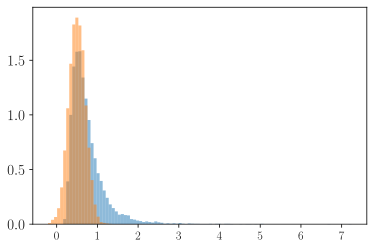

In [52]:
from scipy.stats import invgamma, norm

a_test = 5
l_test = 3
invgamma_test = invgamma.rvs(a_test, scale=l_test, size=10000)

mu_test = inv_gamma_mu(a_test, l_test)
sigma_test = np.sqrt(inv_gamma_var(a_test, l_test))

norm_test = norm.rvs(mu_test, sigma_test, size=10000)

q_min = norm_test.min()
q_max = norm_test.max()

p_min = invgamma_test.min()
p_max = invgamma_test.max()

qp_min = np.min([q_min, p_min])
qp_max = np.max([q_max, p_max])

plt.hist(invgamma_test, density=True, bins=100, alpha=0.5, range=[qp_min, qp_max])
plt.hist(norm_test, density=True, bins=100, alpha=0.5, range=[qp_min, qp_max])
plt.show();

In [53]:
# compute KL div

p_hist, _ = np.histogram(invgamma_test, density=True, bins=100, range=[qp_min, qp_max])
q_hist, _ = np.histogram(norm_test, density=True, bins=100, range=[qp_min, qp_max])

KL_div = np.sum(p_hist * np.log(p_hist/(q_hist + 1e-8) + 1e-8))
print(KL_div)

19.528428187162337


In [54]:
def KL_div_samples_inv_gamma(a, l, num_samples, base='standard', plot=False):
    
    invgamma_samples = invgamma.rvs(a, scale=l, size=num_samples)
    num_bins = int(np.sqrt(num_samples))
    
    #make sure that base is valid
    assert(base in ['standard', 'log', 'sqrt'])
    
    if base == 'log':
    
        invgamma_samples_log = np.log(invgamma_samples)
        mu_invgamma_log = inv_gamma_t_log_mu(a, l)
        sigma_invgamma_log = np.sqrt(inv_gamma_t_log_var(a))
        norm_samples = norm.rvs(mu_invgamma_log, sigma_invgamma_log, size=num_samples)

        q_min = norm_samples.min()
        q_max = norm_samples.max()
        p_min = invgamma_samples_log.min()
        p_max = invgamma_samples_log.max()
        qp_min = np.min([q_min, p_min])
        qp_max = np.max([q_max, p_max])

        p_hist, _ = np.histogram(invgamma_samples_log, density=True, bins=num_bins, range=[qp_min, qp_max])
        q_hist, _ = np.histogram(norm_samples, density=True, bins=num_bins, range=[qp_min, qp_max])

        KL_div = np.sum(p_hist * np.log(p_hist/(q_hist + 1e-8) + 1e-8))
        
        if plot:
            plt.title("log")
            plt.hist(invgamma_samples_log, density=True, bins=num_bins, range=[q_min, q_max], alpha=0.5)
            plt.hist(norm_samples, density=True, bins=num_bins, range=[q_min, q_max], alpha=0.5)
            plt.show();

        return(KL_div)
    
    elif base == 'sqrt':
    
        invgamma_samples_sqrt = np.sqrt(invgamma_samples)
        mu_invgamma_sqrt = inv_gamma_t_sqrt_mu(a, l)
        sigma_invgamma_sqrt = np.sqrt(inv_gamma_t_sqrt_var(a, l))
        norm_samples = norm.rvs(mu_invgamma_sqrt, sigma_invgamma_sqrt, size=num_samples)

        q_min = norm_samples.min()
        q_max = norm_samples.max()
        p_min = invgamma_samples_sqrt.min()
        p_max = invgamma_samples_sqrt.max()
        qp_min = np.min([q_min, p_min])
        qp_max = np.max([q_max, p_max])

        p_hist, _ = np.histogram(invgamma_samples_sqrt, density=True, bins=num_bins, range=[qp_min, qp_max])
        q_hist, _ = np.histogram(norm_samples, density=True, bins=num_bins, range=[qp_min, qp_max])

        KL_div = np.sum(p_hist * np.log(p_hist/(q_hist + 1e-8) + 1e-8))
        
        if plot:
            plt.title("sqrt")
            plt.hist(invgamma_samples_sqrt, density=True, bins=num_bins, range=[qp_min, qp_max], alpha=0.5)
            plt.hist(norm_samples, density=True, bins=num_bins, range=[qp_min, qp_max], alpha=0.5)
            plt.show();

        return(KL_div)
    
    elif base == 'standard':
    
        mu_invgamma = inv_gamma_mu(a, l)
        sigma_invgamma = np.sqrt(inv_gamma_var(a, l))
        norm_samples = norm.rvs(mu_invgamma, sigma_invgamma, size=num_samples)

        q_min = norm_samples.min()
        q_max = norm_samples.max()
        p_min = invgamma_samples.min()
        p_max = invgamma_samples.max()
        qp_min = np.min([q_min, p_min])
        qp_max = np.max([q_max, p_max])

        p_hist, _ = np.histogram(invgamma_samples, density=True, bins=num_bins, range=[qp_min, qp_max])
        q_hist, _ = np.histogram(norm_samples, density=True, bins=num_bins, range=[qp_min, qp_max])

        KL_div = np.sum(p_hist * np.log(p_hist/(q_hist + 1e-8) + 1e-8))
        
        if plot:
            plt.title("standard")
            plt.hist(invgamma_samples, density=True, bins=num_bins, range=[qp_min, qp_max], alpha=0.5)
            plt.hist(norm_samples, density=True, bins=num_bins, range=[qp_min, qp_max], alpha=0.5)
            plt.show();

        return(KL_div)



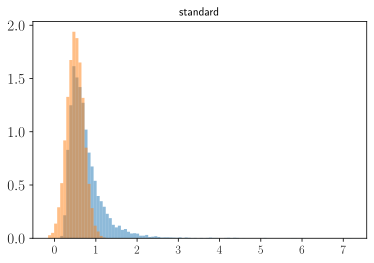

21.827275508817465


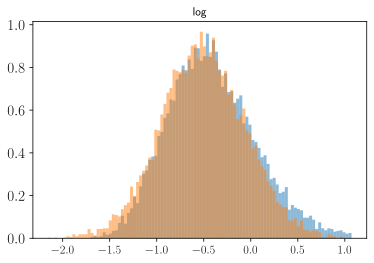

2.1848698811885767


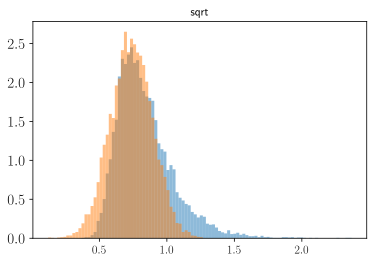

35.63827608221366


In [55]:
print(KL_div_samples_inv_gamma(a_test, l_test, 10000, base='standard', plot=True))
print(KL_div_samples_inv_gamma(a_test, l_test, 10000, base='log', plot=True))
print(KL_div_samples_inv_gamma(a_test, l_test, 10000, base='sqrt', plot=True))

In [56]:
def KL_div_sample_combinations(params, num_samples, verbose=True, plot=False):
    
    As = params[0]
    Ls = params[1]
    
    KL_div_sum = 0
    KL_div_t_sqrt_sum = 0
    KL_div_t_log_sum = 0 

    for a in As:
        for l in Ls:
            
            if verbose:
                print("a: ", a, "l: ", l)
                
            if a < 1:
                print("a < 1: not legitimate in standard base")
            
            #compute KL-div for log and sqrt bases
            KL_div_log_ = KL_div_samples_inv_gamma(a, l, num_samples, base='log', plot=plot)
            KL_div_sqrt_ = KL_div_samples_inv_gamma(a, l, num_samples, base='sqrt', plot=plot)
            
            #calculate the KL divergences for standard base
            if a >= 1:
                KL_div_ = KL_div_samples_inv_gamma(a, l, num_samples, base='standard', plot=plot)
            else:
                KL_div_ = np.nan
            
            
            #add them to their respective sums
            KL_div_sum += KL_div_
            KL_div_t_log_sum += KL_div_log_
            KL_div_t_sqrt_sum += KL_div_sqrt_
            
            if verbose:
                print("standard: ", KL_div_, "log: ", KL_div_log_, "sqrt: ", KL_div_sqrt_)
            
            
    return(KL_div_sum, KL_div_t_log_sum, KL_div_t_sqrt_sum)

In [57]:
print(KL_div_sample_combinations(params=[range(2, 12), range(1, 11)], plot=False, verbose=True, num_samples=10000))

a:  2 l:  1
standard:  2.311150109602951 log:  3.7056858990387394 sqrt:  7.631724448212635
a:  2 l:  2
standard:  2.5455885910971356 log:  3.0240126540261607 sqrt:  8.86061503217804
a:  2 l:  3
standard:  0.5162680760430162 log:  3.620506968450091 sqrt:  10.602307968067448
a:  2 l:  4
standard:  0.9451151029522621 log:  3.8207146555214324 sqrt:  7.808575462415825
a:  2 l:  5
standard:  0.6134265746426065 log:  3.2188892162287783 sqrt:  6.596245195948111
a:  2 l:  6
standard:  0.22341787892034917 log:  2.924875504764767 sqrt:  6.461920565992228
a:  2 l:  7
standard:  0.9492570197501057 log:  2.7676024070775367 sqrt:  3.666400005329845
a:  2 l:  8
standard:  0.2464080665975367 log:  3.1624302349369127 sqrt:  1.6933995896536822
a:  2 l:  9
standard:  0.9141054661992187 log:  2.936961670507245 sqrt:  3.3765699254226407
a:  2 l:  10
standard:  0.4241830340931005 log:  3.4646250925280753 sqrt:  3.0416405999303917
a:  3 l:  1
standard:  22.524091323477705 log:  2.508875057253886 sqrt:  24.040

standard:  84.76330858630367 log:  2.335527936657321 sqrt:  43.42422141031399
a:  11 l:  3
standard:  55.20484657232764 log:  1.5342583035756059 sqrt:  28.169810551512978
a:  11 l:  4
standard:  43.63773847974554 log:  2.028575219450153 sqrt:  26.17814557685064
a:  11 l:  5
standard:  39.526567452882006 log:  2.075660418244162 sqrt:  24.882641818980204
a:  11 l:  6
standard:  26.64227010063679 log:  2.683051207260898 sqrt:  23.512746196658387
a:  11 l:  7
standard:  20.977520786917673 log:  2.758204048095949 sqrt:  20.423420620900952
a:  11 l:  8
standard:  24.549103804361657 log:  1.774885447987541 sqrt:  21.95588037845663
a:  11 l:  9
standard:  19.491931927190702 log:  1.5447459562188723 sqrt:  14.215201118128956
a:  11 l:  10
standard:  17.215359423151337 log:  2.2857332610391174 sqrt:  16.59673445523408
(2868.266119983077, 235.5647520022604, 2183.090276587957)


# KL-divergence from samples attempt 2

In [58]:
def KL_div_samples_inv_gamma2(a, l, num_samples, base='standard', plot=False):
    
    invgamma_samples = invgamma.rvs(a, scale=l, size=num_samples)
    num_bins = int(np.sqrt(num_samples))
    
    #make sure that base is valid
    assert(base in ['standard', 'log', 'sqrt'])
    
    if base == 'log':
    
        invgamma_samples_log = np.log(invgamma_samples)
        mu_invgamma_log = inv_gamma_t_log_mu(a, l)
        sigma_invgamma_log = np.sqrt(inv_gamma_t_log_var(a))

        s = np.array(invgamma_samples_log)
        p_ = inv_gamma_t_log_pdf(s, a, l)
        q_ = norm.pdf(s, mu_invgamma_log, sigma_invgamma_log)
        KL_div_log_ = np.mean(np.log(p_/q_))
            
        if plot:
            x_ = np.linspace(s.min(), s.max(), 1000+1)
            plt.hist(s, density=True, bins=num_bins)
            plt.plot(x_, inv_gamma_t_log_pdf(x_, a, l))
            plt.plot(x_, norm.pdf(x_, mu_invgamma_log, sigma_invgamma_log))
            plt.title('log-base')
            plt.show();
            
        return(KL_div_log_)
    
    elif base == 'sqrt':
    
        invgamma_samples_sqrt = np.sqrt(invgamma_samples)
        mu_invgamma_sqrt = inv_gamma_t_sqrt_mu(a, l)
        sigma_invgamma_sqrt = np.sqrt(inv_gamma_t_sqrt_var(a, l))

        s = np.array(invgamma_samples_sqrt)
        p_ = inv_gamma_t_sqrt_pdf(s, a, l)
        q_ = norm.pdf(s, mu_invgamma_sqrt, sigma_invgamma_sqrt)
        KL_div_sqrt_ = np.mean(np.log((p_ +1e-8)/(q_ +1e-8) ))
            
        if plot:
            x_ = np.linspace(s.min(), s.max(), 1000+1)
            plt.hist(s, density=True, bins=num_bins)
            plt.plot(x_, inv_gamma_t_sqrt_pdf(x_, a, l))
            plt.plot(x_, norm.pdf(x_, mu_invgamma_sqrt, sigma_invgamma_sqrt))
            plt.title('sqrt-base')
            plt.show();
            
        return(KL_div_sqrt_)
    
    elif base == 'standard':
    
        mu_invgamma = inv_gamma_mu(a, l)
        sigma_invgamma = np.sqrt(inv_gamma_var(a, l))

        s = np.array(invgamma_samples)
        p_ = invgamma.pdf(s, a, scale=l)
        q_ = norm.pdf(s, mu_invgamma, sigma_invgamma)
        KL_div_ = np.mean(np.log((p_ +1e-8)/(q_ +1e-8) ))
            
        if plot:
            x_ = np.linspace(s.min(), s.max(), 1000+1)
            plt.hist(s, density=True, bins=num_bins)
            plt.plot(x_, invgamma.pdf(x_, a, scale=l))
            plt.plot(x_, norm.pdf(x_, mu_invgamma, sigma_invgamma))
            plt.title('standard-base')
            plt.show();

        return(KL_div_)



In [59]:
def KL_div_sample_combinations2(params, num_samples, verbose=True, plot=False):
    
    As = params[0]
    Ls = params[1]
    
    KL_div_sum = 0
    KL_div_t_sqrt_sum = 0
    KL_div_t_log_sum = 0 

    for a in As:
        for l in Ls:
            
            if verbose:
                print("a: ", a, "l: ", l)
                
            if a < 1:
                print("a < 1: not legitimate in standard base")
            
            #compute KL-div for log and sqrt bases
            KL_div_log_ = KL_div_samples_inv_gamma2(a, l, num_samples, base='log', plot=plot)
            KL_div_sqrt_ = KL_div_samples_inv_gamma2(a, l, num_samples, base='sqrt', plot=plot)
            
            #calculate the KL divergences for standard base
            if a >= 1:
                KL_div_ = KL_div_samples_inv_gamma2(a, l, num_samples, base='standard', plot=plot)
            else:
                KL_div_ = np.nan
            
            
            #add them to their respective sums
            KL_div_sum += KL_div_
            KL_div_t_log_sum += KL_div_log_
            KL_div_t_sqrt_sum += KL_div_sqrt_
            
            if verbose:
                print("standard: ", KL_div_, "log: ", KL_div_log_, "sqrt: ", KL_div_sqrt_)
            
            
    return(KL_div_sum, KL_div_t_log_sum, KL_div_t_sqrt_sum)

In [60]:
print(KL_div_sample_combinations2(params=[range(1, 12), range(1, 11)], plot=False, verbose=True, num_samples=10000))

a:  1 l:  1
standard:  5.5254742159101085 log:  0.3235045920286683 sqrt:  2.7148572619782865
a:  1 l:  2
standard:  5.358987996273706 log:  0.292465798937185 sqrt:  2.6445547414146215
a:  1 l:  3
standard:  5.0819432789788985 log:  0.3577051120417947 sqrt:  2.710206424578783
a:  1 l:  4
standard:  5.108253521314259 log:  0.3423685120639142 sqrt:  2.768275100569171
a:  1 l:  5
standard:  5.107656576216742 log:  0.3246834331608828 sqrt:  2.602379669096542
a:  1 l:  6
standard:  5.06372647310833 log:  0.34071230081556814 sqrt:  2.7173282794120945
a:  1 l:  7
standard:  4.974681404789772 log:  0.33513252091181556 sqrt:  2.592470702353032
a:  1 l:  8
standard:  4.911946800110877 log:  0.3397121463248853 sqrt:  2.5951906403862677
a:  1 l:  9
standard:  4.8564024083405295 log:  0.32830044394543306 sqrt:  2.612113167387321
a:  1 l:  10
standard:  4.871671709842092 log:  0.35440459923389217 sqrt:  2.618653376014795
a:  2 l:  1
standard:  3.370266320727548 log:  0.12702014024898364 sqrt:  1.2857

standard:  0.5699720817607337 log:  0.027507898714997918 sqrt:  0.17450032374952532
a:  9 l:  10
standard:  0.59317147422139 log:  0.024203180597916357 sqrt:  0.1862561525305676
a:  10 l:  1
standard:  0.5458439410832928 log:  0.02926371103988972 sqrt:  0.16784094621833534
a:  10 l:  2
standard:  0.5300082877356673 log:  0.020092721092617522 sqrt:  0.16531493365924588
a:  10 l:  3
standard:  0.49255872275144946 log:  0.029233745525368046 sqrt:  0.1604943890121282
a:  10 l:  4
standard:  0.4969682741158686 log:  0.021306424633928445 sqrt:  0.15819661359349174
a:  10 l:  5
standard:  0.5030505157269562 log:  0.025783957654168535 sqrt:  0.1649163866757386
a:  10 l:  6
standard:  0.5091182526339475 log:  0.026376475139762958 sqrt:  0.16433422013323307
a:  10 l:  7
standard:  0.4895755222435864 log:  0.020452486908443042 sqrt:  0.1734016624980258
a:  10 l:  8
standard:  0.5185963538507498 log:  0.023915393499726767 sqrt:  0.17759272322765446
a:  10 l:  9
standard:  0.4896199586530427 log:  

## KL-divergence (mode seeking/backward, from PDF)

In [61]:
def normal_pdf(x, mu, sigma):
    return(1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)**2/sigma**2)))

In [62]:
# check out Samples vs Dir
# True distributions belong to samples_1
# Laplace approximations belong to samples_2

def KL_divergence_pdf(x_linspace, pdf_1, pdf_2, plot=False):
    
    pdf_1[pdf_1 < 1e-6] = 1e-6
    pdf_2[pdf_2 < 1e-6] = 1e-6
    
    #calculate KL_div
    KL_div = (pdf_1 * np.log(pdf_1 / pdf_2))
    
    #fill NaNs with 0
    KL_div = np.nan_to_num(KL_div)

    if plot:
        plt.plot(x_linspace, pdf_1, label='pdf1')
        plt.plot(x_linspace, pdf_2, label='pdf2')
        plt.plot(x_linspace, KL_div, lw=1, label='KL-div')
        plt.legend()
        plt.show()
            
    KL_div = np.sum(np.abs(KL_div))
    
    #normalize for comparison
    KL_div /= np.max(pdf_1)
        
    return(KL_div)

In [63]:
def adjust_dist(a, l, base='standard'):
    
    #base can be any of "standard", "sqrtm" or "log"
    
    if base == "log":
        x_large = np.linspace(-1000, 1000, 2000)
    else:
        x_large = np.linspace(0.0001, 1000, 1000)
        
    if base == "standard":
        
        mode = inv_gamma_mu(a, l)
        sigma = np.sqrt(inv_gamma_var(a, l))
        
        #get the range of x
        IG_pdf_large = inv_gamma_pdf(x_large, a, l)
        N_pdf_large = normal_pdf(x_large, mode, sigma)
        upper = np.max([np.sum(IG_pdf_large > 1e-6), np.sum(N_pdf_large > 1e-6)])
        x_plus = np.linspace(0.0001, upper, 1000)
        
        #now do the actual pdfs
        IG_pdf = inv_gamma_pdf(x_plus, a, l)
        N_pdf = normal_pdf(x_plus, mode, sigma)
        
        return(x_plus, IG_pdf, N_pdf)
    
    if base == "sqrt":
        
        mode_sqrt = inv_gamma_t_sqrt_mu(a, l)
        sigma_sqrt = np.sqrt(inv_gamma_t_sqrt_var(a, l))
        
        #get the range of x
        IG_pdf_large = inv_gamma_t_sqrt_pdf(x_large, a, l)
        N_pdf_large = normal_pdf(x_large, mode_sqrt, sigma_sqrt)
        upper = np.max([np.sum(IG_pdf_large > 1e-6), np.sum(N_pdf_large > 1e-6)])
        x_plus = np.linspace(0.0001, upper, 1000)
        
        #now do the actual pdfs
        IG_pdf = inv_gamma_t_sqrt_pdf(x_plus, a, l)
        N_pdf = normal_pdf(x_plus, mode_sqrt, sigma_sqrt)
        
        return(x_plus, IG_pdf, N_pdf)
    
    if base == "log":
        
        mode_log = inv_gamma_t_log_mu(a, l)
        sigma_log = np.sqrt(inv_gamma_t_log_var(a))
        
        #get the range of x
        IG_pdf_large = inv_gamma_t_log_pdf(x_large, a, l)
        N_pdf_large = normal_pdf(x_large, mode_log, sigma_log)
        range_ = np.max([np.sum(IG_pdf_large > 1e-6), np.sum(N_pdf_large > 1e-6)])
        lower = mode_log - range_/2
        upper = mode_log + range_/2
        x = np.linspace(lower, upper, 1000)
        
        #now do the actual pdfs
        IG_pdf = inv_gamma_t_log_pdf(x, a, l)
        N_pdf = normal_pdf(x, mode_log, sigma_log)
        
        return(x, IG_pdf, N_pdf)
        
        
        

In [64]:
def KL_div_pdf_combinations(params, plot=False, verbose=True):
    
    As = params[0]
    Ls = params[1]
    
    KL_div_sum = 0
    KL_div_t_sqrt_sum = 0
    KL_div_t_log_sum = 0 

    for a in As:
        for l in Ls:
            
            if verbose:
                print("a: ", a, "l: ", l)
                
            if a < 1:
                print("a < 1: not legitimate in standard base")
            
            #get the ranges and pdfs
            if a >= 1:
                x, IG_pdf, N_pdf = adjust_dist(a,l, 'standard')
            x_sqrt, IG_pdf_sqrt, N_pdf_sqrt = adjust_dist(a,l, 'sqrt')
            x_log, IG_pdf_log, N_pdf_log = adjust_dist(a,l, 'log')
            
            #calculate the KL divergences for all bases
            if a >= 1:
                KL_div_ = KL_divergence_pdf(x,IG_pdf, N_pdf, plot=plot)
            else:
                KL_div_ = np.nan
            KL_div_log_ = KL_divergence_pdf(x_log, IG_pdf_log, N_pdf_log, plot=plot)
            KL_div_sqrt_ = KL_divergence_pdf(x_sqrt, IG_pdf_sqrt, N_pdf_sqrt, plot=plot) 
            
            #add them to their respective sums
            if a >= 1:
                KL_div_sum += KL_div_
            else:
                KL_div_sum += np.nan
                
            KL_div_t_log_sum += KL_div_log_
            if not np.isnan(KL_div_sqrt_):
                KL_div_t_sqrt_sum += KL_div_sqrt_
            else:
                print("Value was NaN, added constant 100")
                KL_div_t_sqrt_sum += 100
            
            if verbose:
                print("standard: ", KL_div_, "log: ", KL_div_log_, "sqrt: ", KL_div_sqrt_)
            
            
    return(KL_div_sum, KL_div_t_log_sum, KL_div_t_sqrt_sum)

In [65]:
print(KL_div_pdf_combinations(params=[range(2, 12), range(1, 11)], plot=False, verbose=True))

a:  2 l:  1
standard:  23.469269579312552 log:  50.396884445325206 sqrt:  47.934832320434275
a:  2 l:  2
standard:  28.094588351130387 log:  50.39688444532519 sqrt:  52.43245559334304
a:  2 l:  3
standard:  31.227316252205224 log:  50.39688444532519 sqrt:  52.36536269158259
a:  2 l:  4
standard:  33.8799643168439 log:  50.396884445325185 sqrt:  54.34794144426221
a:  2 l:  5
standard:  35.831504792135675 log:  50.396884445325185 sqrt:  55.20073920401376
a:  2 l:  6
standard:  37.65660803283538 log:  50.39688444532517 sqrt:  55.35502920397725
a:  2 l:  7
standard:  39.42286253747442 log:  50.396884445325185 sqrt:  56.55373110057396
a:  2 l:  8
standard:  40.74451690266524 log:  50.396884445325206 sqrt:  57.38920602649514
a:  2 l:  9
standard:  41.87263895857988 log:  50.39688444532517 sqrt:  57.89048249110914
a:  2 l:  10
standard:  43.16356148070584 log:  50.3968844453252 sqrt:  58.21413856532504
a:  3 l:  1
standard:  36.589654071466605 log:  42.65778877296992 sqrt:  55.700845335409944

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in power
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in power
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in true_divide
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_lau

standard:  75.04548182985991 log:  23.6601463325708 sqrt:  65.36436820818822
a:  8 l:  6
standard:  67.28425226136692 log:  23.66014633257079 sqrt:  47.73710299237098
a:  8 l:  7
standard:  69.55392862232397 log:  18.940492647094953 sqrt:  51.535629337749945
a:  8 l:  8
standard:  71.33383339574588 log:  23.660146332570783 sqrt:  55.06847041356904
a:  8 l:  9
standard:  72.77045418181049 log:  23.660146332570793 sqrt:  58.383769391339534
a:  8 l:  10
standard:  73.95371766408613 log:  23.66014633257079 sqrt:  46.14296876312927
a:  9 l:  1
standard:  69.5999895034311 log:  20.777969385106005 sqrt:  47.29922816251441
a:  9 l:  2
standard:  68.89534781271738 log:  20.77796938510595 sqrt:  66.46107965470478
a:  9 l:  3
standard:  68.45633415647205 log:  20.77796938510597 sqrt:  73.9786608316044
a:  9 l:  4
standard:  68.13175278448368 log:  20.777969385105926 sqrt:  47.145324603370014
a:  9 l:  5
standard:  67.87193063686561 log:  20.777969385105905 sqrt:  52.678552578368084
a:  9 l:  6
st

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in power
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


In [66]:
results_KL_pdf = np.array([10474.674658790878, 815.4892931828754, 8386.6537373575])
results_KL_pdf_normed = results_KL_pdf/results_KL_pdf[0]
print(results_KL_pdf_normed)

[1.         0.07785342 0.80066007]


# Statistical distance measures for small, medium and large $\theta$

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


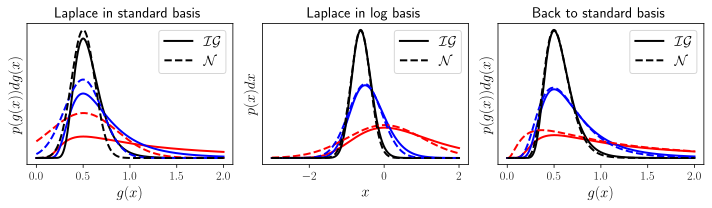

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in power
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: Runtime

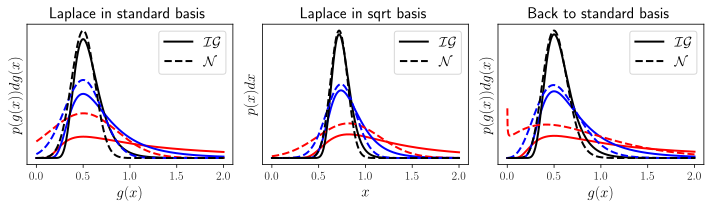

In [67]:
a_s, l_s = 0.99,1
a_m, l_m = 5,3
a_l, l_l = 15, 8
plot_inverse_gamma_t_log(params=[[a_s, l_s], [a_m, l_m], [a_l, l_l]])
plot_inverse_gamma_t_sqrt(params=[[a_s, l_s], [a_m, l_m], [a_l, l_l]])

## calculate MMD for the three pairs of parameters

In [68]:
# use 10 seeds
MMD_results_s = []
MMD_results_m = []
MMD_results_l = []

for s in range(10):
    print("seed: ", s)
    np.random.seed(s)
    torch.manual_seed(s)
    MMD_s = MMD_combinations(params = [[a_s], [l_s]], n_samples=2000)
    MMD_m = MMD_combinations(params = [[a_m], [l_m]], n_samples=2000)
    MMD_l = MMD_combinations(params = [[a_l], [l_l]], n_samples=2000)
    MMD_results_s += [MMD_s]
    MMD_results_m += [MMD_m]
    MMD_results_l += [MMD_l]
    
MMD_results_mean_s = np.array(MMD_results_s).mean(0)
MMD_results_mean_m = np.array(MMD_results_m).mean(0)
MMD_results_mean_l = np.array(MMD_results_l).mean(0)
print(MMD_results_mean_s)
print(MMD_results_mean_m)
print(MMD_results_mean_l)

seed:  0
a:  0.99 l:  1
a < 1: not legitimate in standard base
standard:  nan log:  0.03305387496948242 sqrt:  0.12240314483642578
a:  5 l:  3
standard:  0.03816831111907959 log:  0.0030080676078796387 sqrt:  0.008620858192443848
a:  15 l:  8
standard:  0.003666996955871582 log:  0.001162409782409668 sqrt:  0.0006856322288513184
seed:  1
a:  0.99 l:  1
a < 1: not legitimate in standard base
standard:  nan log:  0.03323918581008911 sqrt:  0.12650954723358154
a:  5 l:  3
standard:  0.031530678272247314 log:  0.002163708209991455 sqrt:  0.007722437381744385
a:  15 l:  8
standard:  0.00428617000579834 log:  0.0011509060859680176 sqrt:  0.0010603070259094238
seed:  2
a:  0.99 l:  1
a < 1: not legitimate in standard base
standard:  nan log:  0.017884254455566406 sqrt:  0.10941195487976074
a:  5 l:  3
standard:  0.0354350209236145 log:  0.0040070414543151855 sqrt:  0.007501184940338135
a:  15 l:  8
standard:  0.004799962043762207 log:  0.0012119412422180176 sqrt:  0.0010649561882019043
seed: 

In [69]:
# normalize to 1 for comparison
MMD_results_mean_s[0] = MMD_results_mean_s[1:].max()
MMD_results_mean_s_normalized = MMD_results_mean_s/MMD_results_mean_s.max()
MMD_results_mean_s_normalized[0] = np.nan
print(MMD_results_mean_s_normalized)
print(MMD_results_mean_m/MMD_results_mean_m.max())
print(MMD_results_mean_l/MMD_results_mean_l.max())

[      nan 0.2309616 1.       ]
[1.         0.12681036 0.22791655]
[1.         0.18739641 0.19290086]


## calculate KL div for the three pairs of parameters

In [70]:
KL_results_s = []
KL_results_m = []
KL_results_l = []

for s in range(10):
    print("seed: ", s)
    np.random.seed(s)
    KL_s = KL_div_pdf_combinations(params = [[a_s], [l_s]])
    KL_m = KL_div_pdf_combinations(params = [[a_m], [l_m]])
    KL_l = KL_div_pdf_combinations(params = [[a_l], [l_l]], plot=False)
    KL_results_s += [KL_s]
    KL_results_m += [KL_m]
    KL_results_l += [KL_l]
    
KL_results_mean_s = np.array(KL_results_s).mean(0)
KL_results_mean_m = np.array(KL_results_m).mean(0)
KL_results_mean_l = np.array(KL_results_l).mean(0)
print(KL_results_mean_s)
print(KL_results_mean_m)
print(KL_results_mean_l)

seed:  0
a:  0.99 l:  1
a < 1: not legitimate in standard base
standard:  nan log:  79.07229272253852 sqrt:  25.050104683744244
a:  5 l:  3
standard:  59.988771742076324 log:  32.26593857244595 sqrt:  61.67957348172226
a:  15 l:  8
standard:  79.8769059993772 log:  15.941330535927984 sqrt:  39.7057531647268
seed:  1
a:  0.99 l:  1
a < 1: not legitimate in standard base
standard:  nan log:  79.07229272253852 sqrt:  25.050104683744244
a:  5 l:  3
standard:  59.988771742076324 log:  32.26593857244595 sqrt:  61.67957348172226
a:  15 l:  8
standard:  79.8769059993772 log:  15.941330535927984 sqrt:  39.7057531647268
seed:  2
a:  0.99 l:  1
a < 1: not legitimate in standard base
standard:  nan log:  79.07229272253852 sqrt:  25.050104683744244
a:  5 l:  3
standard:  59.988771742076324 log:  32.26593857244595 sqrt:  61.67957348172226
a:  15 l:  8
standard:  79.8769059993772 log:  15.941330535927984 sqrt:  39.7057531647268
seed:  3
a:  0.99 l:  1
a < 1: not legitimate in standard base
standard: 

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in power
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in power
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in true_divide
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_lau

In [71]:
# normalize to 1 for comparison
KL_results_mean_s[0] = KL_results_mean_s[1:].max()
KL_results_mean_s_normalized = KL_results_mean_s/KL_results_mean_s.max()
KL_results_mean_s_normalized[0] = np.nan
print(KL_results_mean_s_normalized)
print(KL_results_mean_m/KL_results_mean_m.max())
print(KL_results_mean_l/KL_results_mean_l.max())

[       nan 1.         0.31680003]
[0.97258733 0.52312195 1.        ]
[1.         0.19957371 0.49708677]


# calculate KL div for increasing thetas

In [72]:
As = np.arange(1, 11)
Bs = np.arange(0.5, 5.5, 0.5)
print(len(As), len(Bs))
ABs = np.array(list(zip(As, Bs)))
print(ABs)

10 10
[[ 1.   0.5]
 [ 2.   1. ]
 [ 3.   1.5]
 [ 4.   2. ]
 [ 5.   2.5]
 [ 6.   3. ]
 [ 7.   3.5]
 [ 8.   4. ]
 [ 9.   4.5]
 [10.   5. ]]


In [73]:
KL_results_linear = []

for s in range(10):
    print("seed: ", s)
    np.random.seed(s)
    
    results_seed = []
    for t in ABs:
        a_, b_ = t
        KL_ = KL_div_sample_combinations2(params = [[a_], [b_]], plot=False, num_samples=10000)
        print(KL_)
        results_seed.append(KL_)
    
    KL_results_linear.append(results_seed)

seed:  0
a:  1.0 l:  0.5
standard:  5.798268666978502 log:  0.3234428302806262 sqrt:  2.7817360771547004
(5.798268666978502, 0.3234428302806262, 2.7817360771547004)
a:  2.0 l:  1.0
standard:  3.305149299999039 log:  0.13323996868391313 sqrt:  1.2312063644481215
(3.305149299999039, 0.13323996868391313, 1.2312063644481215)
a:  3.0 l:  1.5
standard:  2.228635859701204 log:  0.08731367481888447 sqrt:  0.7965469332864192
(2.228635859701204, 0.08731367481888447, 0.7965469332864192)
a:  4.0 l:  2.0
standard:  1.6415193420485448 log:  0.06240640463653444 sqrt:  0.5350545763898795
(1.6415193420485448, 0.06240640463653444, 0.5350545763898795)
a:  5.0 l:  2.5
standard:  1.217931083616851 log:  0.044559204039744865 sqrt:  0.416055143431172
(1.217931083616851, 0.044559204039744865, 0.416055143431172)
a:  6.0 l:  3.0
standard:  0.9650220873449739 log:  0.036723733805623 sqrt:  0.3244586540151463
(0.9650220873449739, 0.036723733805623, 0.3244586540151463)
a:  7.0 l:  3.5
standard:  0.822232452796381 

standard:  2.1384442606151586 log:  0.09004595512091464 sqrt:  0.7618000270234412
(2.1384442606151586, 0.09004595512091464, 0.7618000270234412)
a:  4.0 l:  2.0
standard:  1.6231541152191653 log:  0.05840293169716501 sqrt:  0.564573595982197
(1.6231541152191653, 0.05840293169716501, 0.564573595982197)
a:  5.0 l:  2.5
standard:  1.284427166015909 log:  0.046280072936625956 sqrt:  0.40137670152167504
(1.284427166015909, 0.046280072936625956, 0.40137670152167504)
a:  6.0 l:  3.0
standard:  0.9196780019865595 log:  0.037918893017084815 sqrt:  0.28405985193443123
(0.9196780019865595, 0.037918893017084815, 0.28405985193443123)
a:  7.0 l:  3.5
standard:  0.8133939791532291 log:  0.029569252196072166 sqrt:  0.25246833956392556
(0.8133939791532291, 0.029569252196072166, 0.25246833956392556)
a:  8.0 l:  4.0
standard:  0.6832145384782763 log:  0.029383371281343534 sqrt:  0.22583697208386005
(0.6832145384782763, 0.029383371281343534, 0.22583697208386005)
a:  9.0 l:  4.5
standard:  0.583561991099889

In [74]:
# handle the data
KL_results_linear = np.array(KL_results_linear)

# take the mean over the 10 seeds
KL_results_linear_mean = KL_results_linear.mean(0)
print(np.shape(KL_results_linear_mean))

(10, 3)


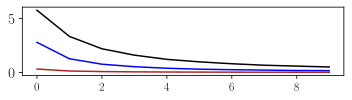

In [79]:
# make plots

fig = plt.figure(figsize=(5, 1.5))
plt.plot(KL_results_linear_mean[:,0], label='standard base', color='black')
plt.plot(KL_results_linear_mean[:,1], label='log base', color='firebrick')
plt.plot(KL_results_linear_mean[:,2], label='sqrt base', color='blue')
#plt.legend()
plt.tight_layout()

#"""
tpl.save(
    "KL_inv_Gamma.tex",
    figure = fig,
    axis_width = "\\figwidth",
    axis_height= "\\figheight",
    tex_relative_path_to_data=".",
    override_externals=False,
    float_format=".3g"
)
#"""
#plt.savefig('KL_inv_Gamma.pdf')

plt.show();

# calculate MMD for the growing a, b and plot it

In [76]:
MMD_results_linear = []

for s in range(10):
    print("seed: ", s)
    np.random.seed(s)
    
    results_seed = []
    for t in ABs:
        a_, b_ = t
        MMD_ = MMD_combinations(params = [[a_], [b_]], n_samples=2000)
        results_seed.append(MMD_)
    
    MMD_results_linear.append(results_seed)

seed:  0
a:  1.0 l:  0.5
standard:  0.1890643835067749 log:  0.02648693323135376 sqrt:  0.09861421585083008
a:  2.0 l:  1.0
standard:  0.09533494710922241 log:  0.016167283058166504 sqrt:  0.03456062078475952
a:  3.0 l:  1.5
standard:  0.07145297527313232 log:  0.009718060493469238 sqrt:  0.021381855010986328
a:  4.0 l:  2.0
standard:  0.04169982671737671 log:  0.007240653038024902 sqrt:  0.011399984359741211
a:  5.0 l:  2.5
standard:  0.03106790781021118 log:  0.007407188415527344 sqrt:  0.008355855941772461
a:  6.0 l:  3.0
standard:  0.022328734397888184 log:  0.0037957429885864258 sqrt:  0.004595696926116943
a:  7.0 l:  3.5
standard:  0.015980422496795654 log:  0.00284421443939209 sqrt:  0.002891242504119873
a:  8.0 l:  4.0
standard:  0.013130784034729004 log:  0.0023747682571411133 sqrt:  0.003032684326171875
a:  9.0 l:  4.5
standard:  0.011715114116668701 log:  0.002261340618133545 sqrt:  0.0024036169052124023
a:  10.0 l:  5.0
standard:  0.008925855159759521 log:  0.00148761272430

standard:  0.008349716663360596 log:  0.0017021894454956055 sqrt:  0.001919865608215332
seed:  8
a:  1.0 l:  0.5
standard:  0.189136803150177 log:  0.028506040573120117 sqrt:  0.09050023555755615
a:  2.0 l:  1.0
standard:  0.10233986377716064 log:  0.016806423664093018 sqrt:  0.039257049560546875
a:  3.0 l:  1.5
standard:  0.05623173713684082 log:  0.005183041095733643 sqrt:  0.0177839994430542
a:  4.0 l:  2.0
standard:  0.038532793521881104 log:  0.0066879987716674805 sqrt:  0.00950998067855835
a:  5.0 l:  2.5
standard:  0.029346764087677002 log:  0.004664778709411621 sqrt:  0.007448792457580566
a:  6.0 l:  3.0
standard:  0.019073069095611572 log:  0.003508448600769043 sqrt:  0.003986775875091553
a:  7.0 l:  3.5
standard:  0.01387101411819458 log:  0.0015426278114318848 sqrt:  0.0031322836875915527
a:  8.0 l:  4.0
standard:  0.013766348361968994 log:  0.001816093921661377 sqrt:  0.003332972526550293
a:  9.0 l:  4.5
standard:  0.011438906192779541 log:  0.002674281597137451 sqrt:  0.00

In [77]:
# handle the data
MMD_results_linear = np.array(MMD_results_linear)

# take the mean over the 10 seeds
MMD_results_linear_mean = MMD_results_linear.mean(0)
print(np.shape(MMD_results_linear_mean))

(10, 3)


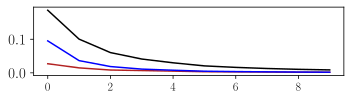

In [80]:
# make plots

fig = plt.figure(figsize=(5, 1.5))
plt.plot(MMD_results_linear_mean[:,0], label='standard base', color='black')
plt.plot(MMD_results_linear_mean[:,1], label='log base', color='firebrick')
plt.plot(MMD_results_linear_mean[:,2], label='sqrt base', color='blue')
#plt.legend()
plt.tight_layout()

#"""
tpl.save(
    "MMD_inv_Gamma.tex",
    figure = fig,
    axis_width = "\\figwidth",
    axis_height= "\\figheight",
    tex_relative_path_to_data=".",
    override_externals=True,
    float_format=".3g"
)
#"""
#plt.savefig('MMD_inv_Gamma.pdf')

plt.show();